In [1]:
import pickle
from pathlib import Path
from periodictable import elements
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import exfor_tools

Using database version X4-2024-12-31 located in: /home/beyerk/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [3]:
from query_elastic import print_failed_parses, query_elastic_data, reattempt_parse

In [4]:
import jitr

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [6]:
target =(120, 50)

In [7]:
(
    (entries_pp, failed_parses_pp),
    (entries_ppr, failed_parses_ppr),
    (entries_nn, failed_parses_nn),
) = query_elastic_data(target)


Parsing (p,p) ...
Found subentry C0893032 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-S']
Found subentry C2174002 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C2174003 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C2174004 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry C2174005 with the following columns:
['EN', 'ANG-CM', 'DATA-CM', 'ERR-T']
Found subentry E2042007 with the following columns:
['POL-BM-MIN', 'POL-BM-MAX', 'EN', 'ANG-CM', 'DATA-CM', 'DATA-ERR']
Found subentry O0049010 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']
Failed to parse subentry O0049010:
	Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Found subentry O0124004 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'DATA-ERR1', 'DATA-ERR2', 'ANG-CM', 'DATA', 'FLAG']
Failed to parse subentry O0124004:
	Ambi

# $(p,p)$

## Handle failed parses for $(p,p)$

In [8]:
print_failed_parses(failed_parses=failed_parses_pp)

Entry: O0049
O0049010  :  Ambiguous statistical error labels:
MONIT-ERR, ERR-T, ERR-DIG
Entry: O0124
O0124004  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2
Entry: O0142
O0142010  :  Ambiguous statistical error labels:
ERR-1, ERR-T


In [9]:
# per the paper:
# Thl statistical errors for the cross sections were 1 to 2 % for 6 < 25” and 3 to 6 %
# for 6 > 25”. The overall uncertainty in the absolute cross sections was estimated to
# be 5 %

entries_pp["O0049"] = reattempt_parse(
    failed_parses_pp["O0049"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-DIG", "ERR-T"],
        "systematic_err_labels": ["MONIT-ERR"],
    },
)

Found subentry O0049010 with the following columns:
['EN', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ERR-T', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA-CM']


In [10]:
entries_pp["O0124"] = reattempt_parse(
    failed_parses_pp["O0124"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels" : [],
    },
)

Found subentry O0124004 with the following columns:
['EN', 'EN-ERR', 'ANG-ERR', 'DATA-ERR1', 'DATA-ERR2', 'ANG-CM', 'DATA', 'FLAG']


In [11]:
entries_pp["O0142"] = reattempt_parse(
    failed_parses_pp["O0142"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-T"],
        "systematic_err_labels": ["ERR-1"],
    },
)

Found subentry O0142010 with the following columns:
['EN', 'ERR-1', 'ANG-CM', 'DATA-CM', 'ERR-T']


## Reject none-useful, discrepant our outlying experiments

# $(p,p)$ ratio

## handle failed parses for $(p,p)$ ratio

In [12]:
print_failed_parses(failed_parses=failed_parses_ppr)

Entry: O0302
O0302006  :  Ambiguous statistical error labels:
DATA-ERR1, DATA-ERR2, ERR-DIG
Entry: O0328
O0328007  :  Ambiguous statistical error labels:
ERR-2, ERR-3, ERR-DIG, ERR-1


In [13]:
entries_ppr["O0302"] = reattempt_parse(
    failed_parses_ppr["O0302"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1", "ERR-DIG"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry O0302006 with the following columns:
['EN', 'DATA-ERR1', 'DATA-ERR2', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA']


In [14]:
#"ERR-ANALYS (ERR-1) Statistical errors and the uncertainty
#            in background subtraction.
#           (ERR-2) Uncertainty in the current integration
#           (ERR-3) Uncertainty in determining the target thickness"

entries_ppr["O0328"] = reattempt_parse(
    failed_parses_ppr["O0328"],
    parsing_kwargs={
        "statistical_err_labels": ["ERR-1", "ERR-DIG"],
        "systematic_err_labels": ["ERR-2","ERR-3"],
    },
)

Found subentry O0328007 with the following columns:
['EN', 'EN-ERR', 'ERR-2', 'ERR-3', 'ANG-ERR-D', 'ERR-DIG', 'ANG-CM', 'DATA', 'ERR-1']


## Reject non-useful, discrepant our outlying experiments

## handle failed parses for $(n,n)$

In [15]:
print_failed_parses(failed_parses=failed_parses_nn)

Entry: 10633
10633017  :  Ambiguous statistical error labels:
DATA-ERR2, MONIT-ERR, DATA-ERR1


In [16]:
entries_nn["10633"] = reattempt_parse(
    failed_parses_nn["10633"],
    parsing_kwargs={
        "statistical_err_labels": ["DATA-ERR1"],
        "systematic_err_labels": ["DATA-ERR2"],
    },
)

Found subentry 10633017 with the following columns:
['EN', 'DATA-ERR2', 'ANG-NRM', 'MONIT', 'MONIT-ERR', 'ANG-RSL', 'ANG-CM', 'DATA-CM', 'DATA-ERR1']


# Plotting

## Plot $(p,p)$

In [28]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_pp)

In [29]:
[[m.Einc for m in l] for l in measurements_categorized]

[[16.0],
 [20.6],
 [25.2],
 [30.4, 30.3],
 [30.6],
 [36.2],
 [103.5],
 [134.7],
 [156.0],
 [200.0]]

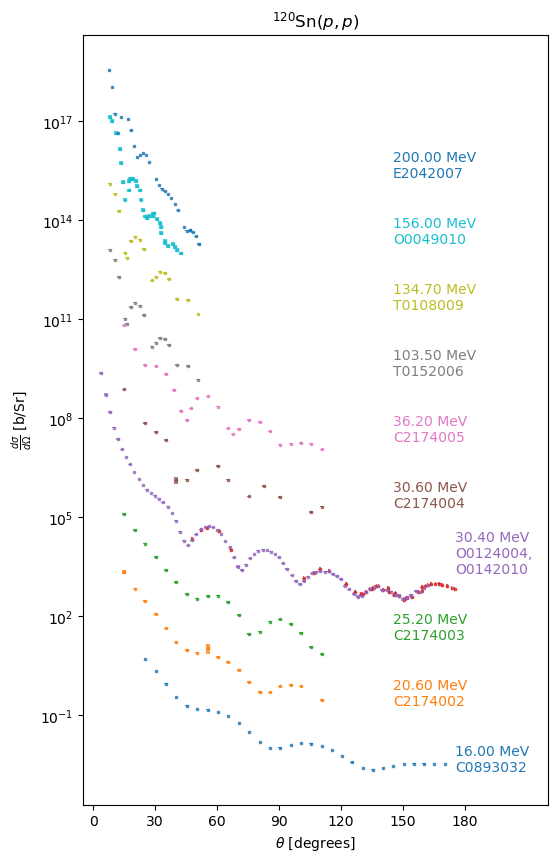

In [30]:
n_per_plot = 10
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 10))
if not isinstance(axes,np.ndarray):
    axes = [axes]
for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_pp.values())[0].data_symbol,
        rxn_label=list(entries_pp.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": None,
            "label_offset_factor": 0.002,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
    axes[i].set_xlim([-5, 220])

## Handle outliers

In [20]:
print(entries_pp['C2174'].measurements[0].y[:10])
entries_pp['C2174'].measurements[0].y[8] *= 10
entries_pp['C2174'].measurements[0].y_err[8] *= 10
entries_pp['C2174'].measurements[0].notes = ["8th pt increased by factor of 10"]

[2.2086e+01 6.8410e+00 2.9160e+00 1.1890e+00 4.3300e-01 1.6170e-01
 9.4200e-02 7.9400e-02 1.0800e-02 5.8500e-02]


## plot $(p,p)$ ratio

In [21]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_ppr)

In [22]:
[[(m.subentry, m.Einc) for m in l] for l in measurements_categorized]

[[('O0169020', 20.4)],
 [('O0169026', 24.6)],
 [('O0328007', 40.0)],
 [('O0788010', 49.35)],
 [('O0300005', 100.4)],
 [('O0302006', 160.0)]]

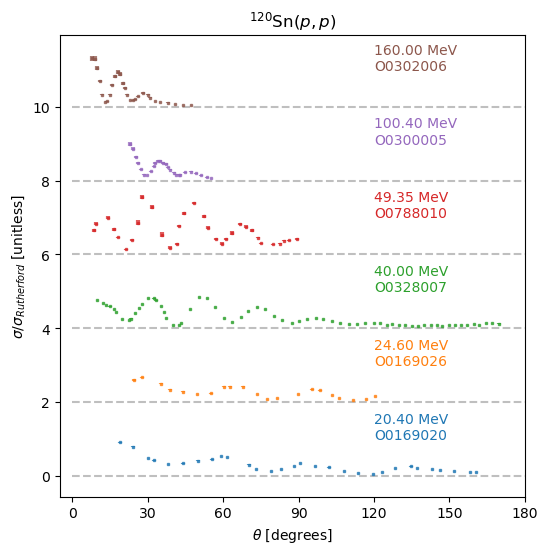

In [23]:
n_per_plot = 9
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot
    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=2,
        data_symbol=list(entries_ppr.values())[0].data_symbol,
        rxn_label=list(entries_ppr.values())[0].rxn,
        label_kwargs={
            "label_xloc_deg": 120,
            "label_offset_factor": 1,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
        log=False,
        draw_baseline=True
    )
    axes[i].set_xlim([-5, 180])

## Plot $(n,n)$

In [24]:
measurements_categorized = exfor_tools.categorize_measurements_by_energy(entries_nn)

In [25]:
[[m.Einc for m in l] for l in measurements_categorized]

[[11.0, 11.01], [13.923], [16.905]]

(-5.0, 210.0)

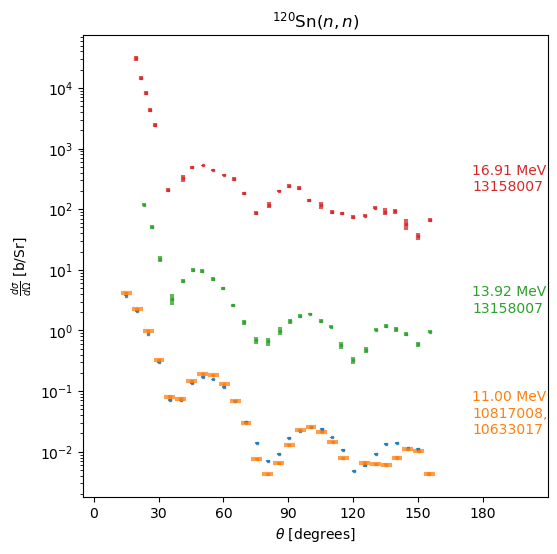

In [26]:
n_per_plot = 6
N = len(measurements_categorized)
num_plots = N // n_per_plot
left_over = N % n_per_plot
if left_over > 0:
    num_plots += 1


fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots,6))
if not isinstance(axes,np.ndarray):
    axes = [axes]

for i in range(num_plots):
    idx0 = i * n_per_plot
    if i == num_plots - 1:
        idxf = N 
    else:
        idxf = (i + 1) * n_per_plot

    exfor_tools.plot_angular_distributions(
        measurements_categorized[idx0:idxf],
        axes[i],
        offsets=100,
        data_symbol=list(entries_nn.values())[0].data_symbol,
        rxn_label=list(entries_nn.values())[0].rxn,
        label_kwargs={
            "label_offset_factor": .02,
            "label_energy_err": False,
            "label_offset": False,
            "label_incident_energy": True,
            "label_excitation_energy": False,
            "label_exfor": True,
        },
    )
axes[0].set_xlim([-5, 210])

# Write data to disk

In [27]:
A, Z = target
with open(f"{elements[Z]}{A}_diff_xs.pkl", "wb") as f:
    pickle.dump({"n,n": entries_nn, "p,p": { "absolute" :  entries_pp , "ratio" : entries_ppr }}, f)